<a href="https://colab.research.google.com/github/Kimminsu-ds/Deep-Learning-NLP-using-Tensorflow/blob/main/02_Basic_Deep_Learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 러닝스푼즈 - Tensorflow를 활용한 딥러닝 자연어처리

## Bag of Words
- Bag of Words란 단어들의 순서는 전혀 고려하지 않고 단어들의 출현 빈도에만 집중하는 텍스트 데이터의 수치화 표현 방법입니다.

In [1]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 448 kB 48.6 MB/s 
     |████████████████████████████████| 86 kB 6.2 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [2]:
from konlpy.tag import Okt
import re

okt = Okt()

# 정규 표현식을 통해 온점을 제거하는 정제 작업
token = re.sub("(\.)","","정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다.")  

# Okt 형태소 분석기를 통해 토큰화 작업을 수행한 뒤에 token에 저장
token = okt.morphs(token)

word2index = {}
bow = []

for voca in token:
  # token을 읽으면서 word2index에 없는 단어는 새로 추가하고 이미 있는 단어는 pass합니다.
  if voca not in word2index.keys():
    word2index[voca] = len(word2index)
    bow.insert(len(word2index)-1, 1) # 단어 빈도는 최소 1이기 때문에 기본값 1
  
  # 재등장하는 단어는 단어의 빈도를 올려줍니다.
  else:
    index = word2index.get(voca)
    bow[index] = bow[index] + 1 

In [3]:
print(word2index)
print(bow)

{'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9}
[1, 2, 1, 1, 2, 1, 1, 1, 1, 1]


## CountVectorizer

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = ['you know I want your love. because I love you.']

vector = CountVectorizer()

# 코퍼스로부터 각 단어의 빈도 수를 기록한다.
print(vector.fit_transform(corpus).toarray())

# 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.
print(sorted(vector.vocabulary_.items(), key = lambda x: x[1]))

[[1 1 2 1 2 1]]
[('because', 0), ('know', 1), ('love', 2), ('want', 3), ('you', 4), ('your', 5)]


## TF-IDF 행렬 만들기

In [5]:
import pandas as pd
from math import log

docs = ['먹고 싶은 사과', '먹고 싶은 바나나', '길고 노란 바나나 바나나', '저는 과일이 좋아요']
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()

print(vocab)

['과일이', '길고', '노란', '먹고', '바나나', '사과', '싶은', '저는', '좋아요']


In [6]:
N = len(docs) # 총 문서 수

def tf(t, d):
  return d.count(t)

def idf(t):
  df = 0
  for doc in docs:
    df += t in doc
  return log(N / (df + 1))

def tfidf(t, d):
  return tf(t, d) * idf(t)

In [7]:
result = []
for i in range(N): 
  result.append([])
  d = docs[i]

  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tf(t, d))

tf_ = pd.DataFrame(result, columns = vocab)
tf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0,0,0,1,0,1,1,0,0
1,0,0,0,1,1,0,1,0,0
2,0,1,1,0,2,0,0,0,0
3,1,0,0,0,0,0,0,1,1


In [8]:
result = []
for j in range(len(vocab)):
  t = vocab[j]
  result.append(idf(t))

idf_ = pd.DataFrame(result, index = vocab, columns = ["IDF"])
idf_

,IDF
과일이,0.693147
길고,0.693147
노란,0.693147
먹고,0.287682
바나나,0.287682
사과,0.693147
싶은,0.287682
저는,0.693147
좋아요,0.693147


In [9]:
result = []
for i in range(N):
  result.append([])
  d = docs[i]
  
  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tfidf(t, d))

tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.000000,0.000000,0.000000,0.287682,0.000000,0.693147,0.287682,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.287682,0.287682,0.000000,0.287682,0.000000,0.000000
2,0.000000,0.693147,0.693147,0.000000,0.575364,0.000000,0.000000,0.000000,0.000000
3,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147


## Tensorflow로 Bag of Words 구현하기

In [10]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

texts = ['먹고 싶은 사과', '먹고 싶은 바나나', '길고 노란 바나나 바나나', '저는 과일이 좋아요']

t = Tokenizer()
t.fit_on_texts(texts)

- 각 단어에 숫자 1부터 시작하는 정수 인덱스가 부여되었습니다.

In [11]:
print(t.word_index)

{'바나나': 1, '먹고': 2, '싶은': 3, '사과': 4, '길고': 5, '노란': 6, '저는': 7, '과일이': 8, '좋아요': 9}


- **`texts_to_matrix()`**는 입력된 텍스트 데이터로부터 행렬을 만들어줍니다.
- **`texts_to_matrix()`**는 "binary", "count", "freq", "tfidf" 총 4개의 모드를 지원합니다.

### count 모드
- 문서 단어 행렬(DTM, Document-Term-Matrix)을 생성합니다.
- DTM에서의 인덱스는 앞서 확인한 word_index의 결과입니다.
- 주의할 점은 각 단어에 부여되는 인덱스는 1부터 시작하는 반면에 완성된 행렬의 인덱스는 0부터 시작합니다.
- 실제 단어의 개수는 9개였지만 행렬의 열의 개수는 10개인 것과 첫번째 열은 모든 행에서 값이 0인 것을 볼 수 있습니다.
- 인덱스 0에는 그 어떤 단어도 할당되지 않았기 때문입니다.
- DTM은 Bag of Words를 기반으로 하므로 단어 순서 정보는 보존되지 않습니다.

In [12]:
print(t.texts_to_matrix(texts, mode = "count"))

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


### binary 모드
- 원-핫 벡터를 행렬로 표현하여 반환

In [13]:
print(t.texts_to_matrix(texts, mode = "binary"))

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


### tfidf 모드
- tfidf 행렬을 반환
- tfidf의 기본 식이나 scikit-learn의 TfidfVectorizer에서 사용하는 식과는 조금 다름
- 자세한 건 구글링

In [14]:
print(t.texts_to_matrix(texts, mode = 'tfidf').round(2))

[[0.   0.   0.85 0.85 1.1  0.   0.   0.   0.   0.  ]
 [0.   0.85 0.85 0.85 0.   0.   0.   0.   0.   0.  ]
 [0.   1.43 0.   0.   0.   1.1  1.1  0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.1  1.1  1.1 ]]


### freq 모드
- 각 문서에서의 각 단어의 등장 횟수를 분자로, 각 문서의 크기(각 문서에서 등장한 모든 단어의 개수 총합)를 분모로 하는 표현 방법

In [15]:
print(t.texts_to_matrix(texts, mode='freq').round(2))

[[0.   0.   0.33 0.33 0.33 0.   0.   0.   0.   0.  ]
 [0.   0.33 0.33 0.33 0.   0.   0.   0.   0.   0.  ]
 [0.   0.5  0.   0.   0.   0.25 0.25 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.33 0.33 0.33]]


## 텐서플로우 Keras 기초

In [16]:
from tensorflow.keras.layers     import Dense
from tensorflow.keras.models     import Sequential
from tensorflow.keras.callbacks  import ModelCheckpoint
from tensorflow.keras.optimizers import Adam

### 딥러닝 실행 순서
  1. 전처리: 학습에 필요한 데이터 전처리를 수행
  2. 모델링(model): 모델을 정의
  3. 컴파일(compile): 모델 생성
  4. 학습(fit): 모델 학습

#### 전처리

In [17]:
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([5.0, 6.0, 7.0, 8.0, 9.0, 10.0], dtype=float)

#### 모델링

In [18]:
model = Sequential()

# Dense의 첫번째 인자는 항상 출력 차원을 의미한다.
model.add(Dense(1, input_dim = 1, activation = "linear"))

#### 컴파일

In [19]:
model.compile(optimizer="sgd", loss="mse")

#### 학습

In [20]:
model.fit(xs, ys, epochs=1200, verbose=0)

#### 검증

In [21]:
model.predict([10.0])

array([[16.000046]], dtype=float32)

#### 기본 모델 구현 이해하기
- tensorflow 2.0은 keras의 Sequential 방식과 동일하게 블록쌓기 방식으로 매우 쉽게 모델링을 할 수 있습니다.
- Dense Layer(= Fully Connected Layer)는 가장 기본적인 신경망 층이라고 이해하시면 됩니다.

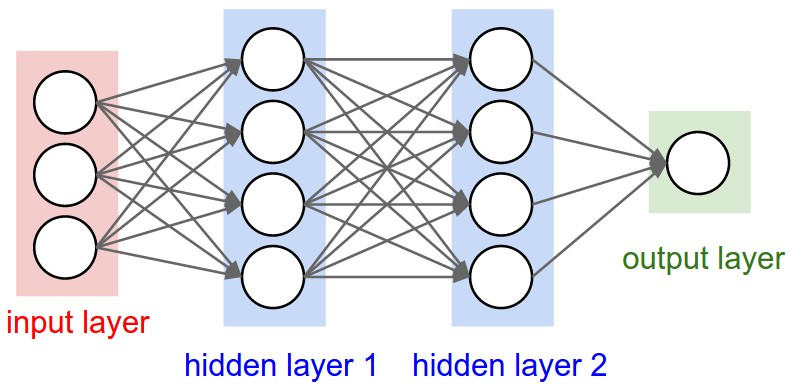

In [22]:
from IPython.display import Image
Image('https://cs231n.github.io/assets/nn1/neural_net2.jpeg')

In [23]:
model = Sequential([
  Dense(1),                    
])

#### 적절한 optimizer와 loss 선정하기
- 우리는 적절한 회귀 값을 예측하는 모델을 만들어야 합니다.
- regression을 위해서는 loss=mse를 선택합니다.
- optimizer는 여러 가지를 활용할 수 있지만, 단순 회귀에서는 sgd가 적당합니다.

#### compile
- 선정한 optimizer와 loss를 지정해주고 compile 합니다.

In [24]:
model.compile(optimizer = "sgd", loss="mse")

#### fit
- **`fit()`** 메소드를 활용하여 학습을 진행합니다.
- 학습 시 feature, label, epochs를 지정합니다.

In [25]:
model.fit(xs, ys, epochs=1200, verbose=0)

#### predict
- 잘 학습이 되었는지 검증합니다.

In [26]:
model.predict([10.0])

array([[16.000046]], dtype=float32)

## Keras로 선형 회귀 구현하기

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras        import optimizers

import numpy as np

In [28]:
X = [1,  2,  3,  4,  5,  6,  7,  8,  9]
y = [11, 22, 33, 44, 53, 66, 77, 87, 95]

In [29]:
model = Sequential()
model.add(Dense(1, input_dim = 1, activation = "linear"))

sgd = optimizers.SGD(lr = 0.01)
model.compile(optimizer = sgd, loss = "mse", metrics = ["mse"])

model.fit(X, y, batch_size = 1, epochs= 300, shuffle = False)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/300
9/9 [==============================] - 0s 2ms/step - loss: 268.7582 - mse: 268.7582
Epoch 2/300
9/9 [==============================] - 0s 2ms/step - loss: 2.0839 - mse: 2.0839
Epoch 3/300
9/9 [==============================] - 0s 2ms/step - loss: 2.0858 - mse: 2.0858
Epoch 4/300
9/9 [==============================] - 0s 2ms/step - loss: 2.0876 - mse: 2.0876
Epoch 5/300
9/9 [==============================] - 0s 2ms/step - loss: 2.0894 - mse: 2.0894
Epoch 6/300
9/9 [==============================] - 0s 2ms/step - loss: 2.0912 - mse: 2.0912
Epoch 7/300
9/9 [==============================] - 0s 2ms/step - loss: 2.0929 - mse: 2.0929
Epoch 8/300
9/9 [==============================] - 0s 2ms/step - loss: 2.0945 - mse: 2.0945
Epoch 9/300
9/9 [==============================] - 0s 3ms/step - loss: 2.0961 - mse: 2.0961
Epoch 10/300
9/9 [==============================] - 0s 2ms/step - loss: 2.0977 - mse: 2.0977
Epoch 11/300
9/9 [==============================] - 0s 2ms/step - loss: 2.0

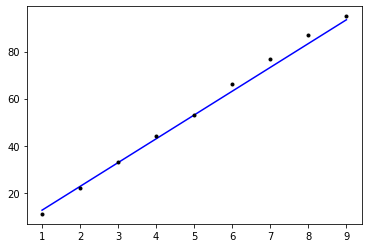

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(X, model.predict(X), 'b', X, y, 'k.')
plt.show()

In [31]:
print(model.predict([9.5]))

[[98.556465]]


## Tape로 선형 회귀 구현하기
- **`tape_gradient()`**는 자동 미분 기능을 수행합니다.
- 임의로 2w^w + 5 라는 식을 세워보고, w에 대해 미분해보겠습니다.

In [32]:
import tensorflow as tf

w = tf.Variable(2.)

def f(w):
   y = w ** 2
   z = 2 * y + 5

   return z

- 이제 gradients를 출력하면 w가 속한 수식을 w로 미분한 값이 저장된 것을 확인할 수 있습니다.

In [33]:
with tf.GradientTape() as tape:
  z = f(w)

gradients = tape.gradient(z, [w])
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


### Tape로 선형 회귀 구현하기

In [34]:
X = [1,  2,  3,  4,  5,  6,  7,  8,  9]
y = [11, 22, 33, 44, 53, 66, 77, 87, 95]

In [35]:
# 훈련할 가중치 변수를 선언 
W = tf.Variable(4.0)
b = tf.Variable(1.0)

In [36]:
@tf.function
def hypothesis(x):
  return W * x + b 

- 테스트를 위한 입력값을 준비합니다.

In [37]:
X_test = [3.5, 5, 5.5, 6]

- 테스트 데이터를 이용해 학습된 선형회귀 모델이 데이터의 경향성(y = 10.6x)을 잘 학습했는지 측정합니다.

In [38]:
print(hypothesis(X_test).numpy())

[15. 21. 23. 25.]


- 손실 함수를 정의합니다.
- MSE = mean { (y'-y) ^ 2 }

In [39]:
@tf.function
def mse_loss(y_pred, y):
  # 두 개의 차이값을 제곱을 해서 평균을 취한다
  return tf.reduce_mean(tf.square(y_pred - y))

In [40]:
optimizer = tf.optimizers.SGD(0.01)

for i in range(301):
  with tf.GradientTape() as tape:
    y_pred = hypothesis(X)
    cost   = mse_loss(y_pred, y)

  gradients = tape.gradient(cost, [W, b])
  optimizer.apply_gradients(zip(gradients, [W, b]))

  if i % 10 == 0:
    print("epoch : {:3} | W의 값 : {:5.4f} | b의 값 : {:5.4} | cost : {:5.6f}".format(i, W.numpy(), b.numpy(), cost))

epoch :   0 | W의 값 : 8.2133 | b의 값 : 1.664 | cost : 1402.555542
epoch :  10 | W의 값 : 10.4971 | b의 값 : 1.977 | cost : 1.351182
epoch :  20 | W의 값 : 10.5047 | b의 값 :  1.93 | cost : 1.328163
epoch :  30 | W의 값 : 10.5119 | b의 값 : 1.884 | cost : 1.306966
epoch :  40 | W의 값 : 10.5188 | b의 값 : 1.841 | cost : 1.287436
epoch :  50 | W의 값 : 10.5254 | b의 값 : 1.799 | cost : 1.269459
epoch :  60 | W의 값 : 10.5318 | b의 값 : 1.759 | cost : 1.252897
epoch :  70 | W의 값 : 10.5379 | b의 값 : 1.721 | cost : 1.237644
epoch :  80 | W의 값 : 10.5438 | b의 값 : 1.684 | cost : 1.223597
epoch :  90 | W의 값 : 10.5494 | b의 값 : 1.648 | cost : 1.210658
epoch : 100 | W의 값 : 10.5548 | b의 값 : 1.614 | cost : 1.198740
epoch : 110 | W의 값 : 10.5600 | b의 값 : 1.582 | cost : 1.187767
epoch : 120 | W의 값 : 10.5650 | b의 값 :  1.55 | cost : 1.177665
epoch : 130 | W의 값 : 10.5697 | b의 값 :  1.52 | cost : 1.168354
epoch : 140 | W의 값 : 10.5743 | b의 값 : 1.492 | cost : 1.159782
epoch : 150 | W의 값 : 10.5787 | b의 값 : 1.464 | cost : 1.151890
epoch 

In [41]:
X_test = [3.5, 5, 5.5, 6, 9.5]
print(hypothesis(X_test).numpy())

[ 38.35479   54.295143  59.608593  64.92204  102.1162  ]


## 로지스틱 회귀 구현하기

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy             as np

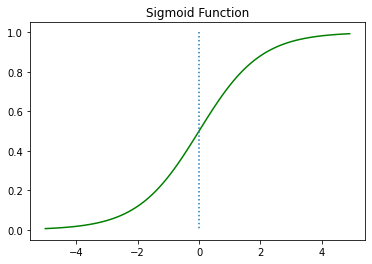

In [43]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0, 0], [1.0, 0.0], ':')
plt.title("Sigmoid Function")
plt.show()

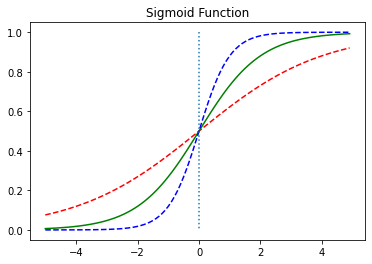

In [44]:
x = np.arange(-5.0, 5.0, 0.1)

y1 = sigmoid(0.5 * x)
y2 = sigmoid(x)
y3 = sigmoid(2 * x)

plt.plot(x, y1, 'r', linestyle='--') # W의 값이 0.5일때
plt.plot(x, y2, 'g')                 # W의 값이 1일때
plt.plot(x, y3, 'b', linestyle='--') # W의 값이 2일때
plt.plot([0, 0], [1.0, 0.0], ':')   # 가운데 점선 추가
plt.title("Sigmoid Function")
plt.show()

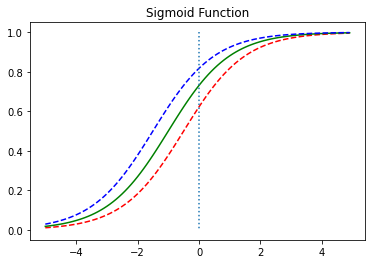

In [45]:
y1 = sigmoid(x + 0.5)
y2 = sigmoid(x + 1)
y3 = sigmoid(x + 1.5)

plt.plot(x, y1, 'r', linestyle='--') # b의 값이 0.5일때
plt.plot(x, y2, 'g')                 # b의 값이 1일때
plt.plot(x, y3, 'b', linestyle='--') # b의 값이 1.5일때
plt.plot([0, 0], [1.0, 0.0], ':')   # 가운데 점선 추가
plt.title("Sigmoid Function")
plt.show()

In [46]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras        import optimizers


X = np.array([-50, -40, -30, -20, -10, -5, 0, 5, 10, 20, 30, 40, 50])
y = np.array([  0,   0,   0,   0,   0,  0, 0, 0,  1,  1,  1,  1,  1])


model = Sequential()


# Dense의 첫 번째 인자는 항상 출력의 차원을 의미
# activation function은 출력값에 적용할 함수를 의미
model.add(Dense(1, input_dim = 1, activation="sigmoid"))


# sgd는 경사하강법을 의미
# lr은 learning rate(학습율)을 의미
sgd = optimizers.SGD(lr=0.01)


# 이진 분류를 위해 activation function으로 sigmoid 함수를 사용한다면 loss는 binary_crossentropy를 사용
model.compile(optimizer = sgd, loss = "binary_crossentropy", metrics = ['binary_accuracy'])


model.fit(X, y, batch_size = 1, epochs = 200, shuffle = False)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/200
13/13 [==============================] - 0s 2ms/step - loss: 0.4087 - binary_accuracy: 0.9231
Epoch 2/200
13/13 [==============================] - 0s 2ms/step - loss: 0.3886 - binary_accuracy: 0.9231
Epoch 3/200
13/13 [==============================] - 0s 2ms/step - loss: 0.3688 - binary_accuracy: 0.9231
Epoch 4/200
13/13 [==============================] - 0s 2ms/step - loss: 0.3493 - binary_accuracy: 0.9231
Epoch 5/200
13/13 [==============================] - 0s 2ms/step - loss: 0.3302 - binary_accuracy: 0.9231
Epoch 6/200
13/13 [==============================] - 0s 2ms/step - loss: 0.3116 - binary_accuracy: 0.9231
Epoch 7/200
13/13 [==============================] - 0s 2ms/step - loss: 0.2936 - binary_accuracy: 0.9231
Epoch 8/200
13/13 [==============================] - 0s 2ms/step - loss: 0.2764 - binary_accuracy: 0.9231
Epoch 9/200
13/13 [==============================] - 0s 2ms/step - loss: 0.2602 - binary_accuracy: 0.9231
Epoch 10/200
13/13 [==========================

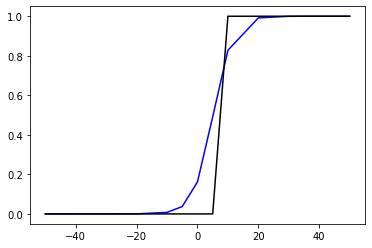

In [47]:
plt.plot(X, model.predict(X), 'b', X, y, 'k')
plt.show()

In [48]:
print(model.predict([1, 2, 3, 4, 4.5]))
print(model.predict([11, 21, 31, 41, 500]))

[[0.21066463]
 [0.2690362 ]
 [0.33668286]
 [0.41175723]
 [0.45115557]]
[[0.86911273]
 [0.9939833 ]
 [0.99975675]
 [0.9999902 ]
 [1.        ]]


## 다중 선형 회귀 구현하기

In [49]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras        import optimizers

In [50]:
# 입력 벡터는 3차원입니다.
X = np.array([[70, 85, 11],
              [71, 89, 18],
              [50, 80, 20],
              [99, 20, 10],
              [50, 10, 10]])

y = np.array([73, 82, 72, 57, 34])

model = Sequential()
model.add(Dense(1, input_dim = 3, activation = 'linear'))

sgd = optimizers.SGD(lr = 0.0001)
model.compile(optimizer = sgd, loss = "mse", metrics = ["mse"])
model.fit(X, y, batch_size = 1, epochs = 500, shuffle = False)

Epoch 1/500


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 2716.5527 - mse: 2716.5527
Epoch 2/500
5/5 [==============================] - 0s 3ms/step - loss: 10061.3848 - mse: 10061.3848
Epoch 3/500
5/5 [==============================] - 0s 3ms/step - loss: 682.9968 - mse: 682.9968
Epoch 4/500
5/5 [==============================] - 0s 3ms/step - loss: 11488.1064 - mse: 11488.1064
Epoch 5/500
5/5 [==============================] - 0s 6ms/step - loss: 1482.8517 - mse: 1482.8517
Epoch 6/500
5/5 [==============================] - 0s 3ms/step - loss: 9852.9023 - mse: 9852.9023
Epoch 7/500
5/5 [==============================] - 0s 3ms/step - loss: 3045.1392 - mse: 3045.1392
Epoch 8/500
5/5 [==============================] - 0s 3ms/step - loss: 8459.1104 - mse: 8459.1104
Epoch 9/500
5/5 [==============================] - 0s 3ms/step - loss: 6074.0674 - mse: 6074.0674
Epoch 10/500
5/5 [==============================] - 0s 3ms/step - loss: 4631.7646 - mse: 4631.7646
Epoch 11/500
5/5 [===========

## 다중 로지스틱 회귀 구현하기

In [51]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras        import optimizers

In [52]:
# 입력 벡터는 2차원입니다. 즉, input_dim은 2입니다.
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([0, 1, 1, 1])

model = Sequential()
model.add(Dense(1, input_dim = 2, activation = "sigmoid"))
model.compile(optimizer = "sgd", loss = "binary_crossentropy", metrics = ["binary_accuracy"])
model.fit(X, y, batch_size = 1, epochs = 800, shuffle = False)

Epoch 1/800
4/4 [==============================] - 0s 3ms/step - loss: 0.8170 - binary_accuracy: 0.5000
Epoch 2/800
4/4 [==============================] - 0s 3ms/step - loss: 0.8068 - binary_accuracy: 0.2500
Epoch 3/800
4/4 [==============================] - 0s 4ms/step - loss: 0.7969 - binary_accuracy: 0.2500
Epoch 4/800
4/4 [==============================] - 0s 4ms/step - loss: 0.7872 - binary_accuracy: 0.2500
Epoch 5/800
4/4 [==============================] - 0s 3ms/step - loss: 0.7779 - binary_accuracy: 0.2500
Epoch 6/800
4/4 [==============================] - 0s 4ms/step - loss: 0.7688 - binary_accuracy: 0.2500
Epoch 7/800
4/4 [==============================] - 0s 3ms/step - loss: 0.7600 - binary_accuracy: 0.2500
Epoch 8/800
4/4 [==============================] - 0s 4ms/step - loss: 0.7514 - binary_accuracy: 0.2500
Epoch 9/800
4/4 [==============================] - 0s 4ms/step - loss: 0.7431 - binary_accuracy: 0.2500
Epoch 10/800
4/4 [==============================] - 0s 4ms/step 

## Keras로 소프트맥스 회귀 구현하기

In [53]:
import tensorflow        as tf
import numpy             as np
import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt

from sklearn.datasets    import load_iris

In [54]:
df = load_iris()
df.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [55]:
X = np.array(df.data,   dtype = np.float32)
y = np.array(df.target, dtype = np.int32)

nb_features = X.shape[1]
nb_classes  = len(set(y))

print("X:", X.shape)
print("y:", y.shape)

print("nb_features:", nb_features)
print("nb_classes :", nb_classes)

X: (150, 4)
y: (150,)
nb_features: 4
nb_classes : 3


In [56]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]], dtype=float32)

- 소프트맥스 회귀를 위한 One-hot 인코딩 변환

In [57]:
y[:5]

array([0, 0, 0, 0, 0], dtype=int32)

In [58]:
y_one_hot = tf.one_hot(indices = list(y), depth = nb_classes)
y_one_hot[:5]

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)>

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras        import optimizers

model = Sequential()

# 입력의 차원은 4, 출력의 차원은 3, activation function은 softmax
model.add(Dense(3, input_dim = 4, activation = "softmax"))

# 옵티마이저는 경사하강법의 일종인 adam을 사용합니다.
# 손실 함수는 cross_entropy 함수를 사용합니다.
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

history = model.fit(X, y_one_hot, batch_size = 1, epochs = 200)

Epoch 1/200
150/150 [==============================] - 2s 2ms/step - loss: 1.9512 - accuracy: 0.0000e+00
Epoch 2/200
150/150 [==============================] - 0s 2ms/step - loss: 1.7667 - accuracy: 0.0467
Epoch 3/200
150/150 [==============================] - 0s 2ms/step - loss: 1.6498 - accuracy: 0.1133
Epoch 4/200
150/150 [==============================] - 0s 2ms/step - loss: 1.5449 - accuracy: 0.0933
Epoch 5/200
150/150 [==============================] - 0s 2ms/step - loss: 1.4421 - accuracy: 0.1267
Epoch 6/200
150/150 [==============================] - 0s 2ms/step - loss: 1.3503 - accuracy: 0.0933
Epoch 7/200
150/150 [==============================] - 0s 2ms/step - loss: 1.2572 - accuracy: 0.1133
Epoch 8/200
150/150 [==============================] - 0s 2ms/step - loss: 1.1766 - accuracy: 0.1800
Epoch 9/200
150/150 [==============================] - 0s 2ms/step - loss: 1.0983 - accuracy: 0.1600
Epoch 10/200
150/150 [==============================] - 0s 2ms/step - loss: 1.0308 - ac

## Tape로 소프트맥스 회귀 구현하기

In [60]:
import tensorflow        as tf
import numpy             as np
import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt

from sklearn.datasets    import load_iris

In [61]:
df = load_iris()
df.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [62]:
X = np.array(df.data,   dtype = np.float32)
y = np.array(df.target, dtype = np.int32)

nb_features = X.shape[1]
nb_classes  = len(set(y))

print("X:", X.shape)
print("y:", y.shape)

print("nb_featuers:", nb_features)
print("nb_classes :", nb_classes)

X: (150, 4)
y: (150,)
nb_featuers: 4
nb_classes : 3


In [63]:
tf.random.set_seed(2020)
W = tf.Variable(tf.random.normal([nb_features, nb_classes], mean = 0.0))
b = tf.Variable(tf.random.normal([nb_classes], mean = 0.0))

# One-hot encoding
y_one_hot = tf.one_hot(indices = list(y), depth = nb_classes)

print("# Weights: \n", W.numpy(), "\n\n# Bias: \n", b.numpy())

# Weights: 
 [[-0.10099822  0.6847899   1.6258513 ]
 [ 0.88112587 -0.63692456 -0.1427695 ]
 [ 0.82411087 -0.91326994 -0.4510184 ]
 [ 0.5805336   1.3066356  -0.60428965]] 

# Bias: 
 [ 0.38414615 -0.6159301  -0.5453214 ]


In [64]:
learning_rate = 0.01

def softmax(X):
  sm = tf.nn.softmax(tf.matmul(X, W) + b)
  return sm

# Train
for i in range(10000+1):
  with tf.GradientTape() as tape:
    sm = softmax(X)
    cost = tf.reduce_mean(-tf.reduce_sum(y_one_hot * tf.math.log(sm), axis=1))
    W_grad, b_grad = tape.gradient(cost, [W, b])

    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)

  if i % 1000 == 0:
    print(">>> #%s \n Weights: \n%s \n Bias: \n%s \n cost: %s\n" % (i, W.numpy(), b.numpy(), cost.numpy()))

>>> #0 
 Weights: 
[[-0.11743643  0.70453906  1.6225402 ]
 [ 0.87678254 -0.62771267 -0.14763811]
 [ 0.80348897 -0.8990887  -0.44457778]
 [ 0.57257193  1.3110503  -0.60074264]] 
 Bias: 
[ 0.382134   -0.61260384 -0.54663545] 
 cost: 3.9675086

>>> #1000 
 Weights: 
[[ 0.16433357  1.3574845   0.6878183 ]
 [ 1.7573066  -0.6487723  -1.0071024 ]
 [-0.8606213  -0.5406397   0.861084  ]
 [-0.19550526  1.0364838   0.4419002 ]] 
 Bias: 
[ 0.56550527 -0.43386948 -0.9087409 ] 
 cost: 0.4030607

>>> #2000 
 Weights: 
[[ 0.31688705  1.5321449   0.36060718]
 [ 2.0306034  -0.6994985  -1.2296745 ]
 [-1.2645828  -0.59373426  1.3181396 ]
 [-0.3816475   0.72599596  0.9385294 ]] 
 Bias: 
[ 0.62806755 -0.33476657 -1.0704056 ] 
 cost: 0.29343703

>>> #3000 
 Weights: 
[[ 0.42719242  1.6423259   0.14011958]
 [ 2.2220876  -0.71238434 -1.4082739 ]
 [-1.546792   -0.6306485   1.6372663 ]
 [-0.511728    0.49702492  1.2975819 ]] 
 Bias: 
[ 0.67292666 -0.25323108 -1.196799  ] 
 cost: 0.23829421

>>> #4000 
 Weights: 

In [65]:
predicted = tf.argmax(softmax(X), axis=1)
real = tf.argmax(y_one_hot, axis=1)

def acc(predicted, real):
  accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, real), dtype=tf.float32))
  return accuracy

accuracy = acc(predicted, real).numpy()
print("Accuracy: %s" % accuracy)

Accuracy: 0.97333336


## 다층 퍼셉트론으로 MNIST 분류하기

In [66]:
import tensorflow as tf
import numpy      as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras        import optimizers

In [67]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

11501568/11490434 [==============================] - 0s 0us/step


In [68]:
model = Sequential([
  Flatten(input_shape = (28, 28)),
  Dense(128, activation = "relu"),
  Dropout(0.2),
  Dense(10, activation = "softmax")])

model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
model.fit(X_train, y_train, epochs = 5)
model.evaluate(X_test, y_test, verbose = 2)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2935 - accuracy: 0.9146
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1457 - accuracy: 0.9561
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1073 - accuracy: 0.9675
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0870 - accuracy: 0.9732
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0764 - accuracy: 0.9761
313/313 - 1s - loss: 0.0716 - accuracy: 0.9767


[0.07158736884593964, 0.9767000079154968]

## 다층 퍼셉트론으로 20개의 뉴스 기사 그룹 분류하기

In [69]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups

%matplotlib inline
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils              import to_categorical

- 사이킷런에서는 20개의 다른 주제를 가진 18,846개의 뉴스 그룹 이메일 데이터를 제공합니다.

In [70]:
newsdata = fetch_20newsgroups(subset = "train") # 훈련 데이터만 다운로드

- 해당 데이터는 data, filenames, target_names, target, DESCR이라는 5개의 속성을 가지고 있습니다.
- 이 중 실제로 훈련에 사용할 속성은 이메일 본문인 data와 메일이 어떤 주제인지 기재된 숫자 레이블인 target입니다.

In [71]:
print(newsdata.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [72]:
print("훈련용 샘플의 개수: {}".format(len(newsdata.data)))

훈련용 샘플의 개수: 11314


In [73]:
print("총 주제의 개수: {}".format(len(newsdata.target_names)))
print(newsdata.target_names)

총 주제의 개수: 20
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [74]:
print("첫번째 샘플의 레이블: {}".format(newsdata.target[0]))

첫번째 샘플의 레이블: 7


In [75]:
print("7번 레이블이 의미하는 주제: {}".format(newsdata.target_names[7]))

7번 레이블이 의미하는 주제: rec.autos


In [76]:
print(newsdata.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







- data로부터 데이터프레임 생성

In [77]:
data = pd.DataFrame(newsdata.data, columns = ['email'])
data['target'] = pd.Series(newsdata.target)
data[:5]

,email,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   11314 non-null  object
 1   target  11314 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 176.9+ KB


In [79]:
data.isnull().values.any()

False

In [80]:
print("중복을 제외한 샘플의 수: {}".format(data['email'].nunique()))
print("중복을 제외한 주제의 수: {}".format(data['target'].nunique()))

중복을 제외한 샘플의 수: 11314
중복을 제외한 주제의 수: 20


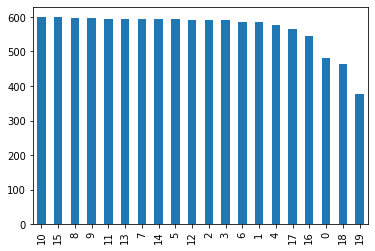

In [81]:
data['target'].value_counts().plot(kind="bar")

In [82]:
print(data.groupby("target").size().reset_index(name="count"))

    target  count
0        0    480
1        1    584
2        2    591
3        3    590
4        4    578
5        5    593
6        6    585
7        7    594
8        8    598
9        9    597
10      10    600
11      11    595
12      12    591
13      13    594
14      14    593
15      15    599
16      16    546
17      17    564
18      18    465
19      19    377


In [83]:
newsdata_test = fetch_20newsgroups(subset = "test", shuffle = True)

train_email = data["email"]
train_label = data['target']

test_email = newsdata_test.data
test_label = newsdata_test.target

In [84]:
# 실습에 사용할 단어의 최대 개수
max_words = 10000 

# 레이블의 수
num_classes = 20

In [85]:
# 전처리 함수
def prepare_data(train_data, test_data, mode): 
  t = Tokenizer(num_words = max_words)
  t.fit_on_texts(train_data)

  X_train = t.texts_to_matrix(train_data, mode = mode)
  X_test  = t.texts_to_matrix(test_data,  mode = mode)

  return X_train, X_test, t.index_word

In [86]:
# One-hot encoding
X_train, X_test, index_to_word = prepare_data(train_email, test_email, "binary")

# One-hot encoding
y_train = to_categorical(train_label, num_classes)
y_test  = to_categorical(test_label,  num_classes)

In [87]:
print("훈련   샘플 본문의   크기: {}".format(X_train.shape))
print("훈련   샘플 레이블의 크기: {}".format(y_train.shape))
print("테스트 샘플 본문의   크기: {}".format(X_test.shape))
print("테스트 샘플 레이블의 크기: {}".format(y_test.shape))

훈련   샘플 본문의   크기: (11314, 10000)
훈련   샘플 레이블의 크기: (11314, 20)
테스트 샘플 본문의   크기: (7532, 10000)
테스트 샘플 레이블의 크기: (7532, 20)


In [88]:
print("빈도수 상위 1번    단어: {}".format(index_to_word[1]))
print("빈도수 상위 9999번 단어: {}".format(index_to_word[9999]))

빈도수 상위 1번    단어: the
빈도수 상위 9999번 단어: mic


In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [90]:
def fit_and_evaluate(X_train, y_train , X_test, y_test):
  model = Sequential()
  model.add(Dense(256, input_shape=(10000, ), activation="relu"))
  model.add(Dense(128, activation="relu"))
  model.add(Dense(20,  activation="softmax"))

  model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
  model.fit(X_train, y_train, batch_size = 128, epochs = 5, verbose = 1, validation_split = 0.1)
  score = model.evaluate(X_test, y_test, batch_size = 128, verbose = 0)
  return score[1]

In [91]:
modes = ["binary", "count", "tfidf", "freq"]

for mode in modes:
  X_train, X_test, _ = prepare_data(train_email, test_email, mode)
  score = fit_and_evaluate(X_train, y_train, X_test, y_test)
  print(mode + " 모드의 테스트 정확도:", score)

Epoch 1/5
80/80 [==============================] - 2s 23ms/step - loss: 1.2565 - accuracy: 0.7205 - val_loss: 0.4763 - val_accuracy: 0.8763
Epoch 2/5
80/80 [==============================] - 1s 8ms/step - loss: 0.1933 - accuracy: 0.9628 - val_loss: 0.3255 - val_accuracy: 0.9072
Epoch 3/5
80/80 [==============================] - 1s 8ms/step - loss: 0.0614 - accuracy: 0.9926 - val_loss: 0.3036 - val_accuracy: 0.9152
Epoch 4/5
80/80 [==============================] - 1s 8ms/step - loss: 0.0236 - accuracy: 0.9984 - val_loss: 0.2987 - val_accuracy: 0.9152
Epoch 5/5
80/80 [==============================] - 1s 8ms/step - loss: 0.0128 - accuracy: 0.9990 - val_loss: 0.2958 - val_accuracy: 0.9117
binary 모드의 테스트 정확도: 0.816781759262085
Epoch 1/5
80/80 [==============================] - 2s 19ms/step - loss: 1.3925 - accuracy: 0.6919 - val_loss: 0.5838 - val_accuracy: 0.8595
Epoch 2/5
80/80 [==============================] - 1s 8ms/step - loss: 0.3423 - accuracy: 0.9373 - val_loss: 0.4484 - val_accu

## 다층 퍼셉트론으로 네이버 영화 리뷰 분류하기

In [92]:
!pip install konlpy

In [93]:
import pandas as pd
import urllib.request

urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt",  filename="ratings_test.txt")

('ratings_test.txt', <http.client.HTTPMessage at 0x7fafde8727d0>)

In [94]:
train_data = pd.read_table("ratings_train.txt")
train_data[:5]

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [95]:
def read_data(filename):
  with open(filename, 'r') as f:
    data = [line.split("\t") for line in f.read().splitlines()]
    data = data[1:] # txt 파일의 헤더(id document label)는 제외하기

  return data

train_data = read_data("ratings_train.txt")
test_data  = read_data("ratings_test.txt")

In [96]:
print(len(train_data))
print(len(train_data[0]))

print(len(test_data))
print(len(test_data[0]))

150000
3
50000
3


In [97]:
from konlpy.tag import Okt

okt = Okt()
print(okt.pos(u'이 밤 그날의 반딧불을 당신의 창 가까이 보낼게요'))

[('이', 'Noun'), ('밤', 'Noun'), ('그날', 'Noun'), ('의', 'Josa'), ('반딧불', 'Noun'), ('을', 'Josa'), ('당신', 'Noun'), ('의', 'Josa'), ('창', 'Noun'), ('가까이', 'Noun'), ('보낼게요', 'Verb')]


In [98]:
import json
import os

from pprint import pprint

def tokenize(doc):
  # norm은 정규화, stem은 근어로 표시하기를 나타냄
  return ["/".join(t) for t in okt.pos(doc, norm=True, stem=True)]

if os.path.isfile("train_docs.json"):
  with open("train_docs.json") as f:
    train_docs = json.load(f)
  with open("test_docs.json") as f:
    test_docs = json.load(f)

else:
  train_docs = [(tokenize(row[1]), row[2]) for row in train_data]
  test_docs  = [(tokenize(row[1]), row[2]) for row in test_data]

  # JSON 파일로 저장
  with open("train_docs.json", 'w', encoding='utf-8') as make_file:
    json.dump(train_docs, make_file, ensure_ascii = False, indent="\t")
  with open("test_docs.json", 'w', encoding='utf-8') as make_file:
    json.dump(test_docs, make_file, ensure_ascii = False, indent="\t")

pprint(train_docs[0])

(['아/Exclamation',
  '더빙/Noun',
  '../Punctuation',
  '진짜/Noun',
  '짜증나다/Adjective',
  '목소리/Noun'],
 '0')


In [99]:
tokens = [t for d in train_docs for t in d[0]]
print(len(tokens))

2159921


In [100]:
import nltk
text = nltk.Text(tokens, name="NMSC")

# 전체 토큰의 개수
print(len(text.tokens))

# 중복을 제외한 토큰의 개수
print(len(set(text.tokens)))

# 출현 빈도가 높은 상위 토큰 10개
pprint(text.vocab().most_common(10))

2159921
49895
[('./Punctuation', 67778),
 ('영화/Noun', 50818),
 ('하다/Verb', 41209),
 ('이/Josa', 38540),
 ('보다/Verb', 38538),
 ('의/Josa', 30188),
 ('../Punctuation', 29055),
 ('가/Josa', 26627),
 ('에/Josa', 26468),
 ('을/Josa', 23118)]


In [101]:
selected_words = [f[0] for f in text.vocab().most_common(1000)]

def term_frequency(doc):
  return [doc.count(word) for word in selected_words]

X_train = [term_frequency(d) for d, _ in train_docs]
X_test  = [term_frequency(d) for d, _ in test_docs]

y_train = [c for _, c in train_docs]
y_test  = [c for _, c in test_docs]

In [102]:
import numpy as np

X_train = np.asarray(X_train).astype("float32")
X_test  = np.asarray(X_test).astype("float32")

y_train = np.asarray(y_train).astype("float32")
y_test  = np.asarray(y_test).astype("float32")

In [103]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(150000, 1000)
(50000, 1000)
(150000,)
(50000,)


In [104]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras        import optimizers
from tensorflow.keras        import losses
from tensorflow.keras        import metrics

model = Sequential()
model.add(Dense(64, activation="relu", input_shape=(1000, )))
model.add(Dense(64, activation="relu"))
model.add(Dense(1,  activation="sigmoid"))

model.compile(optimizer = optimizers.RMSprop(lr=0.001), loss = losses.binary_crossentropy, metrics = [metrics.binary_accuracy])
model.fit(X_train, y_train, epochs = 10, batch_size = 512)
results = model.evaluate(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
293/293 [==============================] - 2s 4ms/step - loss: 0.4308 - binary_accuracy: 0.8023
Epoch 2/10
293/293 [==============================] - 1s 5ms/step - loss: 0.3811 - binary_accuracy: 0.8243
Epoch 3/10
293/293 [==============================] - 1s 4ms/step - loss: 0.3664 - binary_accuracy: 0.8329
Epoch 4/10
293/293 [==============================] - 1s 5ms/step - loss: 0.3537 - binary_accuracy: 0.8405
Epoch 5/10
293/293 [==============================] - 1s 5ms/step - loss: 0.3417 - binary_accuracy: 0.8475
Epoch 6/10
293/293 [==============================] - 1s 4ms/step - loss: 0.3304 - binary_accuracy: 0.8527
Epoch 7/10
293/293 [==============================] - 1s 5ms/step - loss: 0.3190 - binary_accuracy: 0.8596
Epoch 8/10
293/293 [==============================] - 1s 4ms/step - loss: 0.3076 - binary_accuracy: 0.8651
Epoch 9/10
293/293 [==============================] - 1s 4ms/step - loss: 0.2965 - binary_accuracy: 0.8708
Epoch 10/10
1563/1563 [==============